In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
path = '/content/drive/MyDrive/Pokemon/'

In [ ]:
print(os.listdir(path))

['pokemon', 'pokemon_jpg']


In [ ]:
for i in os.listdir(path):
  print(i, len(os.listdir(path + i)))

pokemon 1
pokemon_jpg 1


In [ ]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [ ]:
img = image.load_img(path + 'pokemon_jpg/pokemon_jpg/25.jpg')

In [ ]:
img = image.img_to_array(img)

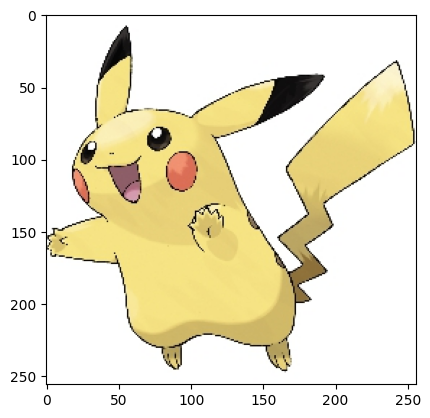

In [ ]:
plt.imshow(img/255)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_X = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip=True
)

In [ ]:
train_gen = train_X.flow_from_directory(path,
                                        target_size = (250, 250),
                                        batch_size = 5,
                                        class_mode = 'categorical')

Found 1640 images belonging to 2 classes.


In [ ]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top = False)

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet_model.layers:
  layer.trainable = True

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model_output = resnet_model.output
model_output = GlobalAveragePooling2D()(model_output)
model_output = Dense(1000, activation = 'relu')(model_output)
model_output = Dense(2, activation = 'softmax')(model_output)

In [ ]:
model = Model(inputs = resnet_model.input, outputs = model_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
hist = model.fit(train_gen, epochs = 30)

Epoch 1/30
328/328 [==============================] - 171s 378ms/step - loss: 0.2884 - accuracy: 0.9689 - precision: 0.9689 - recall: 0.9689
Epoch 2/30
328/328 [==============================] - 44s 133ms/step - loss: 0.0428 - accuracy: 0.9933 - precision: 0.9933 - recall: 0.9933
Epoch 3/30
328/328 [==============================] - 45s 136ms/step - loss: 0.0094 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9963
Epoch 4/30
328/328 [==============================] - 44s 134ms/step - loss: 0.0993 - accuracy: 0.9835 - precision: 0.9835 - recall: 0.9835
Epoch 5/30
328/328 [==============================] - 44s 135ms/step - loss: 0.0368 - accuracy: 0.9927 - precision: 0.9927 - recall: 0.9927
Epoch 6/30
328/328 [==============================] - 44s 135ms/step - loss: 0.0115 - accuracy: 0.9970 - precision: 0.9970 - recall: 0.9970
Epoch 7/30
328/328 [==============================] - 45s 136ms/step - loss: 0.0101 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9963
Epoch 8/30
328/328 